# Instructions:

Since the original files found at: https://azurecloudpublicdataset2.blob.core.windows.net/azurepublicdatasetv2/azurefunctions_dataset2019/azurefunctions-dataset2019.tar.xz are very large, the data consolidation was done in my local machine instead of Colab.
There is a Github Repository where I have the notebook I used: https://github.com/abadias618/AzureDataMiningProj it's a Public Repo, so feel free to clone it and use it on your local machine for testing, although I believe it's very close to the file that Ghazal had showed us. I also thought that having the CSVs on github is advantageous because we can just import them by URL working in Colab.

The total datasize for the complete file is about 150MB, but Github has a cap of 50 MB per file for commiting, so I decided to split the files into 3, they're named:
<ul>first_half.csv</ul>
<ul>second_half.csv</ul>
<ul>third_half.csv</ul>



In [ ]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
###################################
# IMPORT DATA                         
###################################
first = pd.read_csv('https://github.com/abadias618/AzureDataMiningProj/blob/main/first_half.csv?raw=true')
second = pd.read_csv('https://github.com/abadias618/AzureDataMiningProj/blob/main/second_half.csv?raw=true')
third = pd.read_csv('https://github.com/abadias618/AzureDataMiningProj/blob/main/third_half.csv?raw=true')

In [ ]:
# Merge all 3 files and reset pandas index
merged = pd.concat([first, second, third])
merged.reset_index(drop=True, inplace=True)

In [ ]:
# Sanity Check
merged.tail(10)
print(merged.shape[0])
print(merged.shape[1])

619369
15


In [ ]:
#getting the missing values
print(" \nCount total NaN at each column in a DataFrame : ", merged.isnull().sum())

merged=merged.dropna()

#missing data is just 2 so it wont be a big eefect for the dataset


print(" \nCount total NaN at each column in a DataFrame after dropping rows with missing values: ", merged.isnull().sum())


 
Count total NaN at each column in a DataFrame :  HashOwner                 0
HashApp                   0
HashFunction              0
Average                   0
Count                     0
Minimum                   1
Maximum                   1
percentile_Average_0      0
percentile_Average_1      0
percentile_Average_25     0
percentile_Average_50     0
percentile_Average_75     0
percentile_Average_99     0
percentile_Average_100    0
Trigger                   0
dtype: int64
 
Count total NaN at each column in a DataFrame after dropping rows with missing values:  HashOwner                 0
HashApp                   0
HashFunction              0
Average                   0
Count                     0
Minimum                   0
Maximum                   0
percentile_Average_0      0
percentile_Average_1      0
percentile_Average_25     0
percentile_Average_50     0
percentile_Average_75     0
percentile_Average_99     0
percentile_Average_100    0
Trigger                   0
dtype:

In [ ]:
datatypes=merged.dtypes
print(datatypes)
#not doing any encoding as HashOwner, hashapp, hashFunctions are identifiers

HashOwner                  object
HashApp                    object
HashFunction               object
Average                     int64
Count                       int64
Minimum                   float64
Maximum                   float64
percentile_Average_0        int64
percentile_Average_1        int64
percentile_Average_25       int64
percentile_Average_50       int64
percentile_Average_75       int64
percentile_Average_99       int64
percentile_Average_100      int64
Trigger                     int64
dtype: object


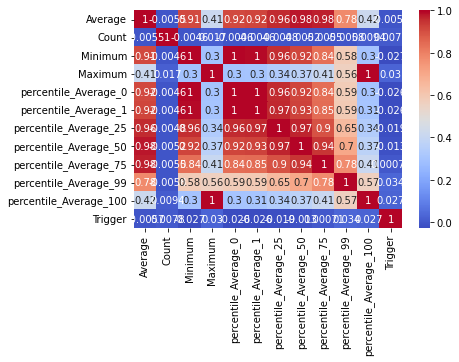

<Figure size 1152x864 with 0 Axes>

In [ ]:
corr_matrix = merged.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.figure(figsize=(16, 12))
plt.show()
#percentile_average_0,1,_25,50,75,99,_100 seems to be correlated to avg
#skeptical  to remove features as the dimensionality is already reduced 

In [ ]:
#considering only numerical features
num_features=['Average','Count','Minimum','Maximum','percentile_Average_0','percentile_Average_25','percentile_Average_50','percentile_Average_75','percentile_Average_99','percentile_Average_100','Trigger']
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()
merged[num_features] = scaler.fit_transform(merged[num_features])

In [ ]:
#outliers 
#DBSCAN identify clusters based on the density of the data points and  points that are not part of any cluster can be considered as noise.
#needs only numerical data 
from sklearn.ensemble import IsolationForest

isof = IsolationForest(contamination=0.1, random_state=42)

isof.fit(merged[num_features])

outliers = isof.predict(merged[num_features]) == -1

print('Number of potential outliers:', sum(outliers))
#thats  a lot of datapoints will consider doing with dbscan

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of potential outliers: 61937


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(merged[num_features])

# Interpret the results
print("Explained variance:", pca.explained_variance_ratio_)

Explained variance: [0.60353275 0.15508278]


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(merged, test_size=0.25, random_state=22, shuffle=True)
print("Train Dataset size :",train.shape[0])
print("Test Dataset size :",test.shape[0])

Train Dataset size : 464526
Test Dataset size : 154842
